Imports

In [7]:
%load_ext autoreload
%autoreload 1

import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns

from helper import get_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Get the data

In [8]:
symbol = 'MSFT'  # Feel free to change this to whichever stock you want to analyze

data = get_data(symbol=symbol)  # Get the data for the given stock as a DataFrame
data = data.sort_index()
data.head()

,open,high,low,close,volume
timestamp,,,,,
1999-11-01,93.25,94.19,92.12,92.37,26630600
1999-11-02,92.75,94.50,91.94,92.56,23174500
1999-11-03,92.94,93.50,91.50,92.00,22258500
1999-11-04,92.31,92.75,90.31,91.75,27119700
1999-11-05,91.81,92.87,90.50,91.56,35083700


View the data

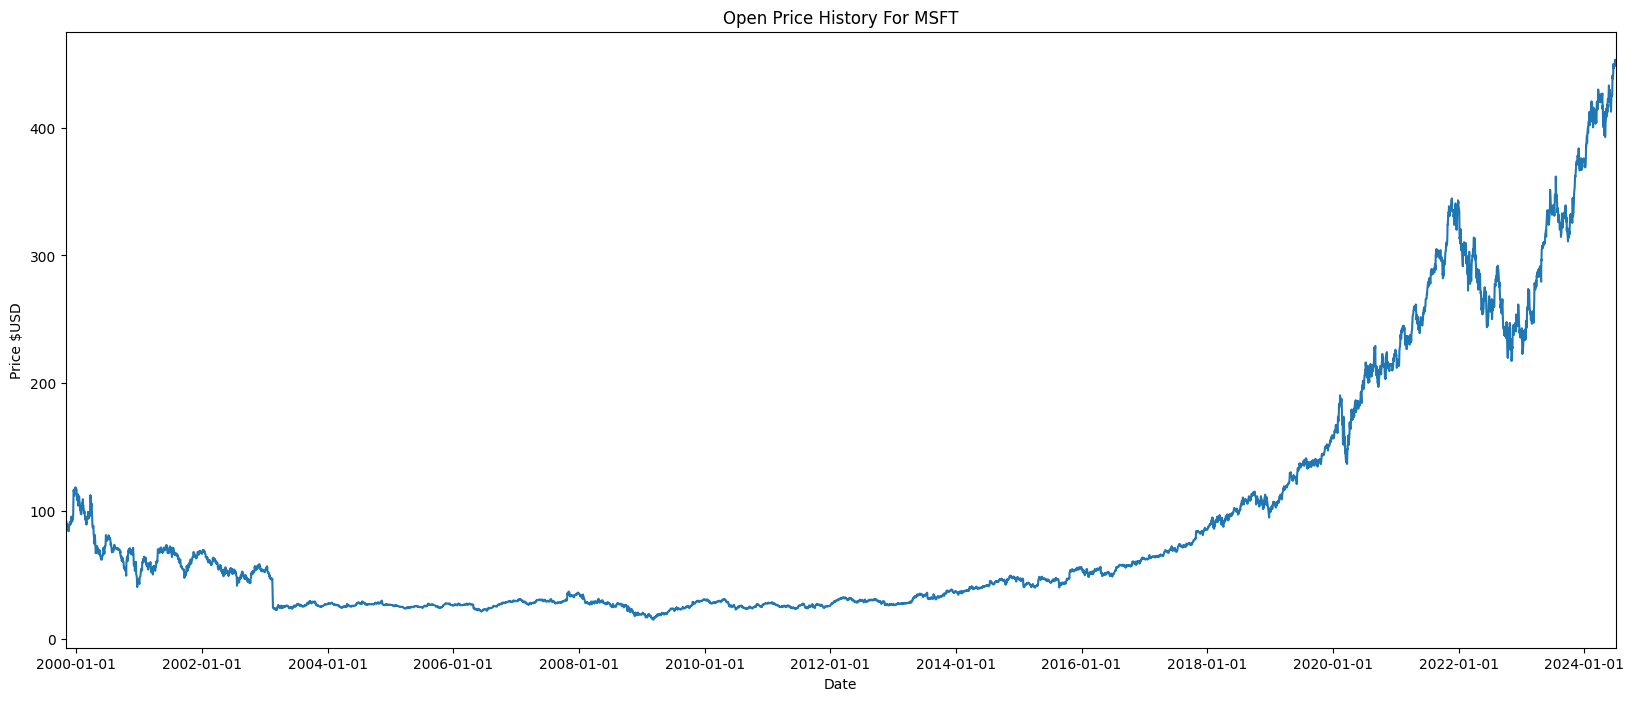

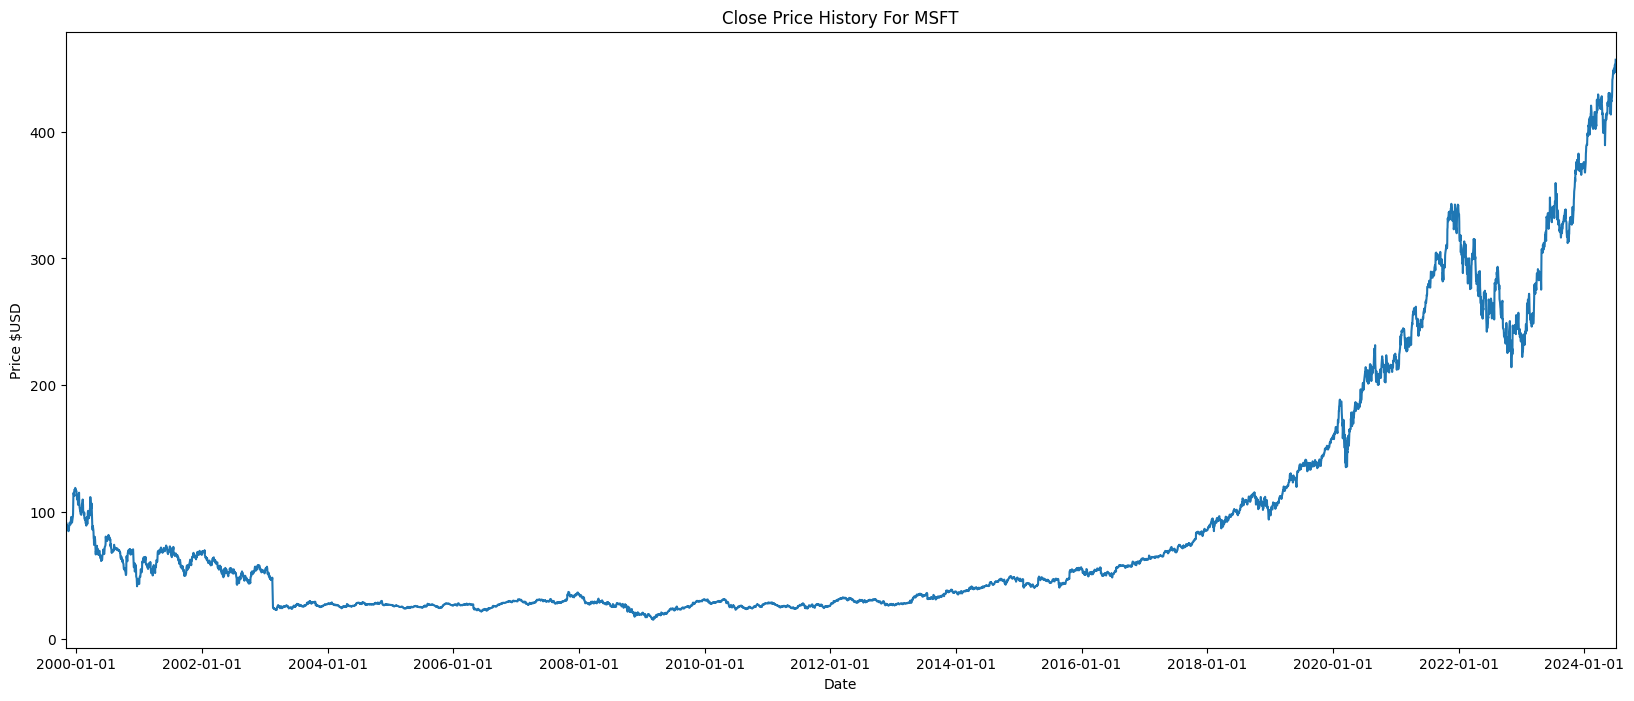

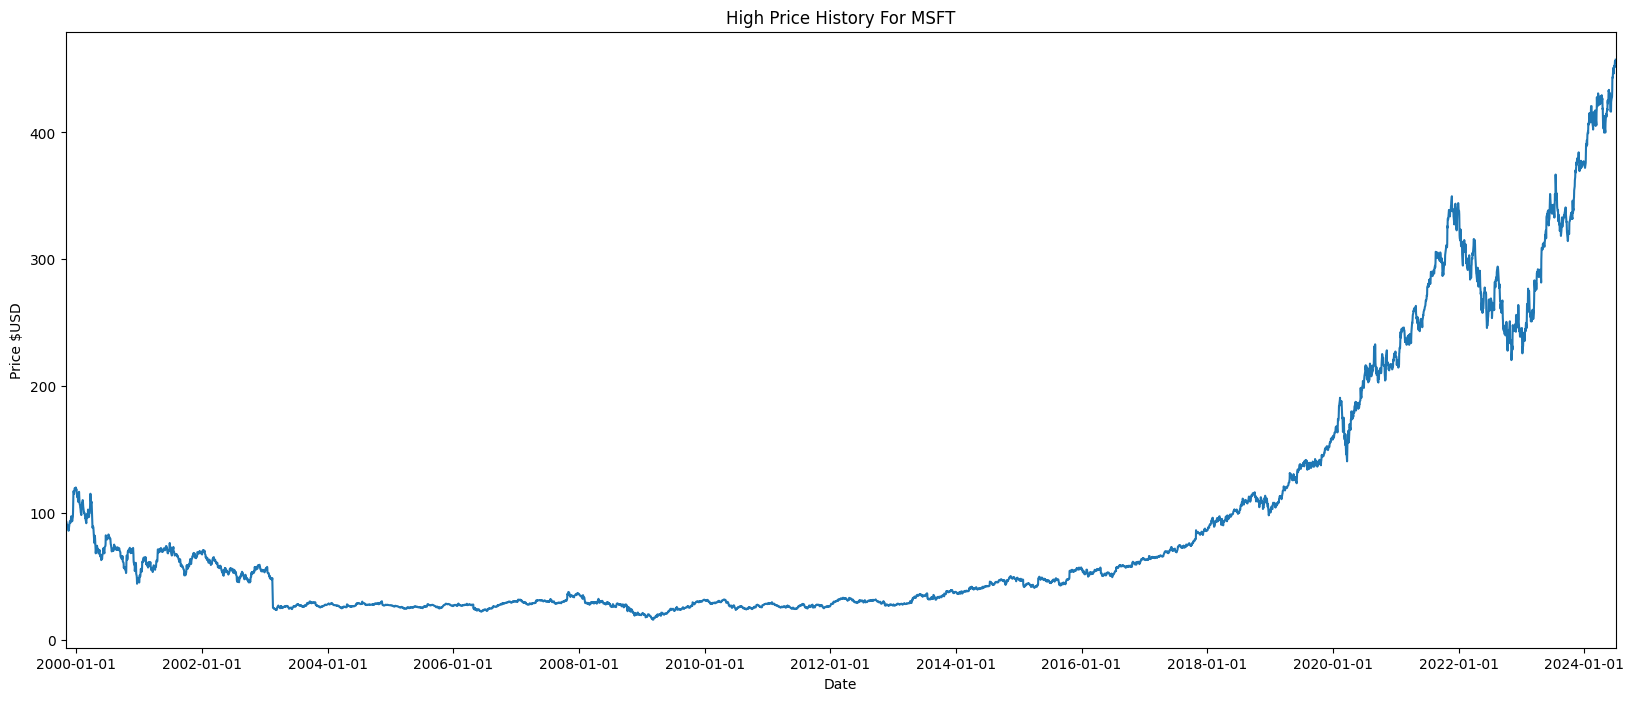

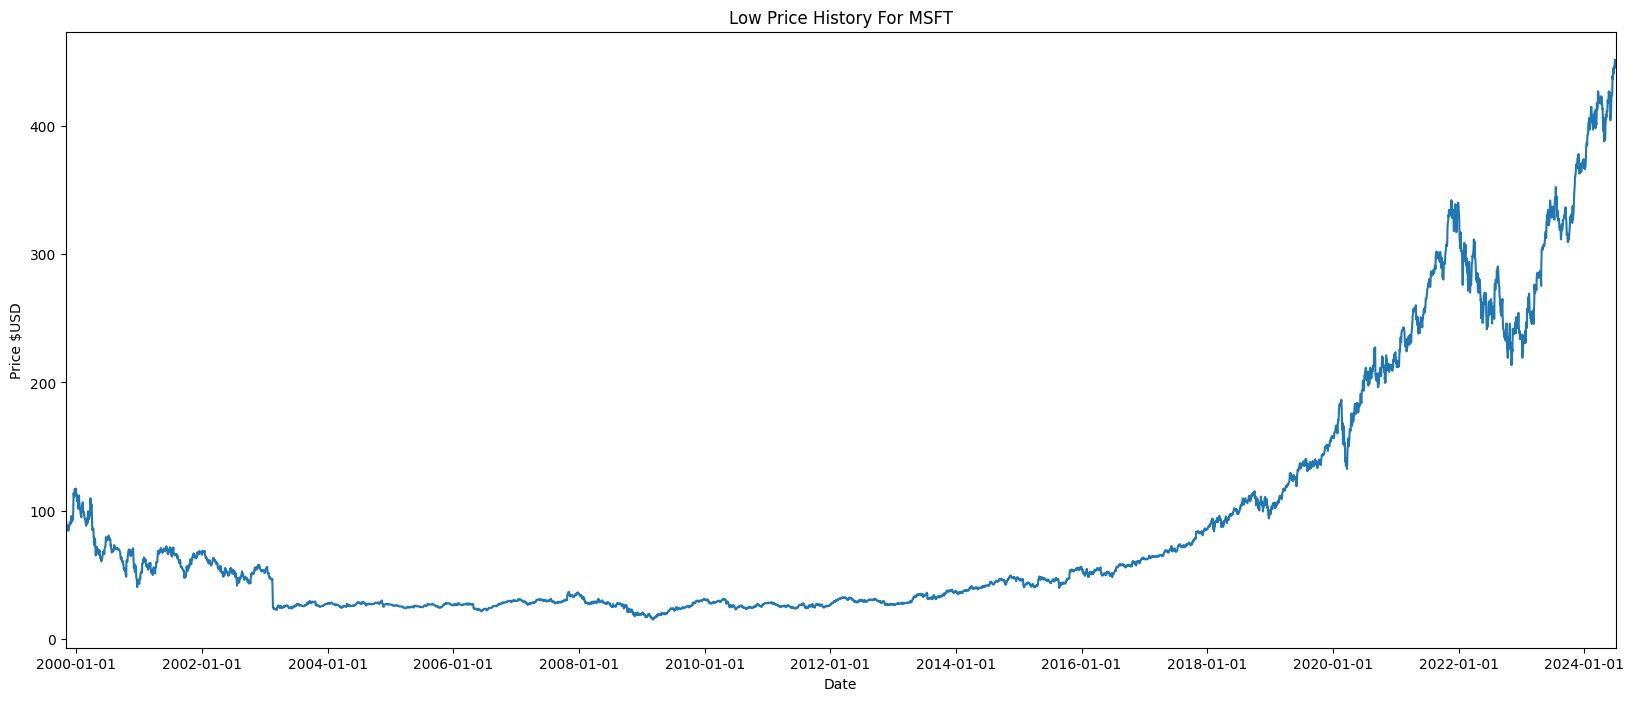

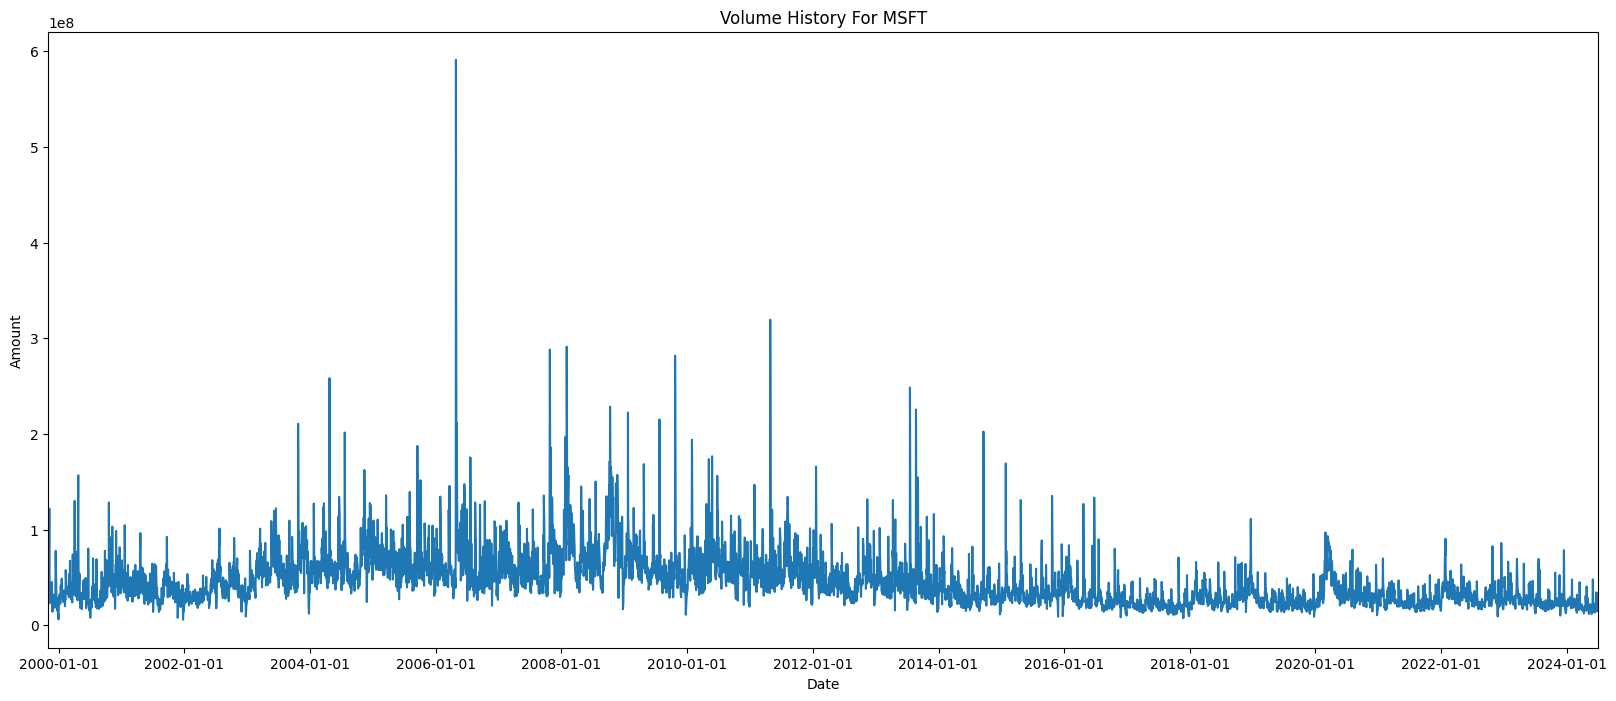

1999-11-01 00:00:00
2024-07-01 00:00:00


In [9]:
plt.figure(figsize=(15, 7))
plt.plot(data.index, data['open'])
plt.xlim([data.index.min(), data.index.max()])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Change interval as needed
plt.xlabel('Date')
plt.ylabel('Price $USD')
plt.title(f'Open Price History For {symbol}')

plt.show()


plt.figure(figsize=(15, 7))
plt.plot(data.index, data['close'])
plt.xlim([data.index.min(), data.index.max()])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Change interval as needed
plt.xlabel('Date')
plt.ylabel('Price $USD')
plt.title(f'Close Price History For {symbol}')

plt.show()


plt.figure(figsize=(15, 7))
plt.plot(data.index, data['high'])
plt.xlim([data.index.min(), data.index.max()])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Change interval as needed
plt.xlabel('Date')
plt.ylabel('Price $USD')
plt.title(f'High Price History For {symbol}')

plt.show()


plt.figure(figsize=(15, 7))
plt.plot(data.index, data['low'])
plt.xlim([data.index.min(), data.index.max()])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Change interval as needed
plt.xlabel('Date')
plt.ylabel('Price $USD')
plt.title(f'Low Price History For {symbol}')

plt.show()


plt.figure(figsize=(15, 7))
plt.plot(data.index, data['volume'])
plt.xlim([data.index.min(), data.index.max()])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Change interval as needed
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title(f'Volume History For {symbol}')

plt.show()